# **A/B TESTING**

In [249]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

## **Load Data**

In [251]:
df = pd.read_csv('cookie_cats.csv')
print(df.shape) # check rows and columns
df.head()

(90189, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## **Data Preparation**

In [253]:
#checking missing values
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [254]:
#get dummies
df[['retention_1', 'retention_7']] = df[['retention_1', 'retention_7']].astype(int)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


## ***Data grouping***

Control_group = gate_30

Treatment_group = gate_40

## ***Metrics***

success of retention and sum of gamerounds

## **Exploratory Data Analysis**

In [260]:
#descriptive statistics
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

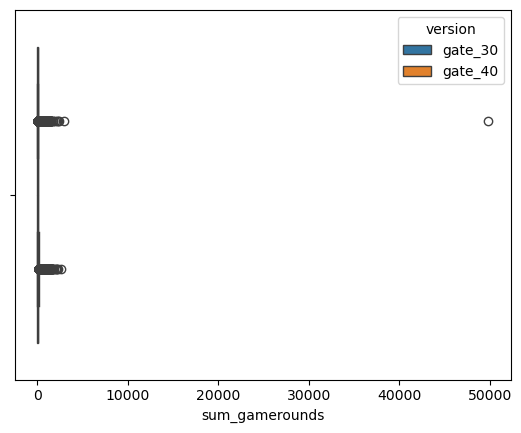

In [261]:
#checking outliers
sns.boxplot(data = df, x = 'sum_gamerounds', hue = 'version');

In [262]:
#removing the outlier
df1 = df[df['sum_gamerounds'] < 600]



<Axes: xlabel='version'>

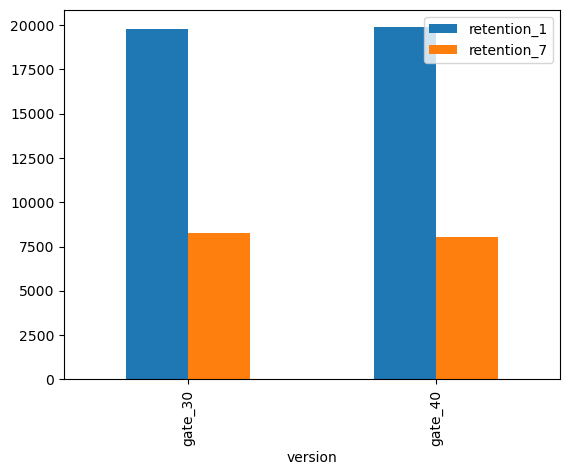

In [263]:
df1.groupby('version')[['retention_1', 'retention_7']].sum().plot(kind = 'bar')

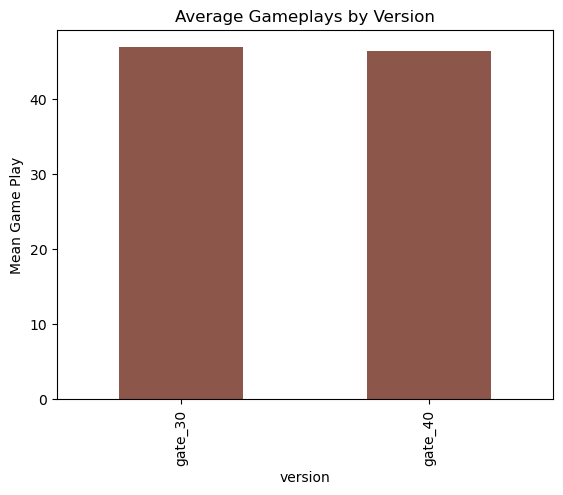

In [264]:
df1.groupby('version')['sum_gamerounds'].mean().plot(kind = 'bar', color = 'C5')
plt.ylabel('Mean Game Play')
plt.title('Average Gameplays by Version');

In [265]:
# calculating retention for day 1
df1[df1['retention_1'] == 1]['retention_1'].sum()

39655

In [266]:
#calculating retention for day 7
df1[df1['retention_7']== 1]['retention_7'].sum()

16286

## **Hypothesis**

**Day 1**

Null Hypothesis = _There is no difference in retention between gate_30 and gate_40 on day 1_

Alternate Hypothesis = _Players using gate_40 with have higher retention than those using gate_30 on day 1_


**Day 7**

Null Hypothesis = _There is no difference in retention between gate_30 and gate_40 on day 7_

Alternate Hypothesis = _Players using gate_40 with have higher retention than those using gate_30 on day 7_

**Game Play Hypothesis**

Null Hypothesis = _The sum of gamerounds for gate_30 is equal to sum of gamerounds for gate_40_

Altenative Hypothesis = _The is a difference in the sum of gamerounds  between gate_30 and gate_40_ 




In [269]:
#retention1  and retention7 , gameplay values 
ret1_values = pd.crosstab(df1['version'], df1['retention_1'] )
print(ret1_values)
print()
ret7_values = pd.crosstab(df1['version'], df1['retention_7'] )
print(ret7_values)
print()


retention_1      0      1
version                  
gate_30      24656  19796
gate_40      25364  19859

retention_7      0     1
version                 
gate_30      36186  8266
gate_40      37203  8020



## **Testing**

In [271]:
#import chi-square 
from scipy.stats import chi2_contingency


In [272]:
#Retention 1 test
chi2_statistic, p_value, dof, expected_values = chi2_contingency(observed  = ret1_values, correction = False)
print(chi2_statistic, p_value)

3.492780472746793 0.061636979146010906


In [273]:
# Retention 7 test
chi2_statistic, p_value, dof, expected_values = chi2_contingency(observed  = ret7_values, correction = False)
print(chi2_statistic, p_value)

11.181061446498568 0.0008263648395142043


In [274]:
#import ttest
import scipy.stats as stats

# grouping data
gate_30 = df1[df1['version']=='gate_30'][['sum_gamerounds']]
gate_40 = df1[df1['version']=='gate_40'][['sum_gamerounds']]

In [275]:
# gameplay test
t_statistic, p_value  = stats.ttest_ind(a = gate_30 , b = gate_40, random_state = 42, equal_var= True)
print(t_statistic, p_value )

[0.83190862] [0.40546274]
